In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# License: MIT

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.3, random_state=0)

C:\Users\roi_y\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


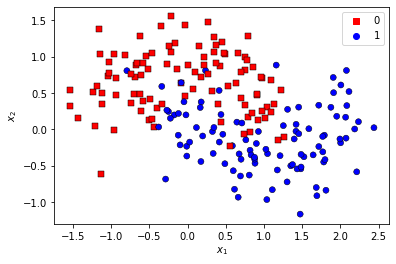

In [3]:
import seaborn as sns

sns.scatterplot(X[:, 0], X[:, 1], hue=y, style=y, markers=('s', 'o'), 
                palette=('r', 'b'), edgecolor='black')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.savefig('figures/moons.pdf')

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

clf1 = LogisticRegression()
clf2 = GaussianNB()
clf3 = DecisionTreeClassifier()

In [5]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier([('log', clf1), ('knn', clf2), ('dt', clf3)], 
                            voting='soft')

In [6]:
from sklearn.model_selection import cross_val_score

names = ['Logistic Regression', 'Gaussian NB', 'Decision Tree', 'Ensemble']
classifiers = [clf1, clf2, clf3, ensemble]

for clf, name in zip(classifiers, names):
    scores = cross_val_score(clf, X, y, cv=5)
    print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f}) [{name}]')

Accuracy: 0.830 (+/- 0.051) [Logistic Regression]
Accuracy: 0.840 (+/- 0.046) [Gaussian NB]
Accuracy: 0.840 (+/- 0.041) [Decision Tree]
Accuracy: 0.885 (+/- 0.037) [Ensemble]


In [7]:
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(clf, X, y, feature_names, class_names, ax,
                             colors=['r', 'b'], markers=('s', 'o')):  
    cmap = ListedColormap(colors)
      
    # Create a mesh of n sample points in the range [x1_min, x1_max] x [x2_min, x2_max]
    n = 1000 
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, n), np.linspace(x2_min, x2_max, n))
    
    # Find the label of each point in the mesh
    y_pred = clf.predict(np.c_[x1.ravel(), x2.ravel()])
    y_pred = y_pred.reshape(x1.shape) 
    
    # Put the result into a color plot 
    plt.sca(ax)
    plt.contourf(x1, x2, y_pred, cmap=cmap, alpha=0.4)
    
    # Plot the points from the data set
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=class_names[y], style=class_names[y], 
                    palette=colors, markers=markers, edgecolor='k')
    
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()

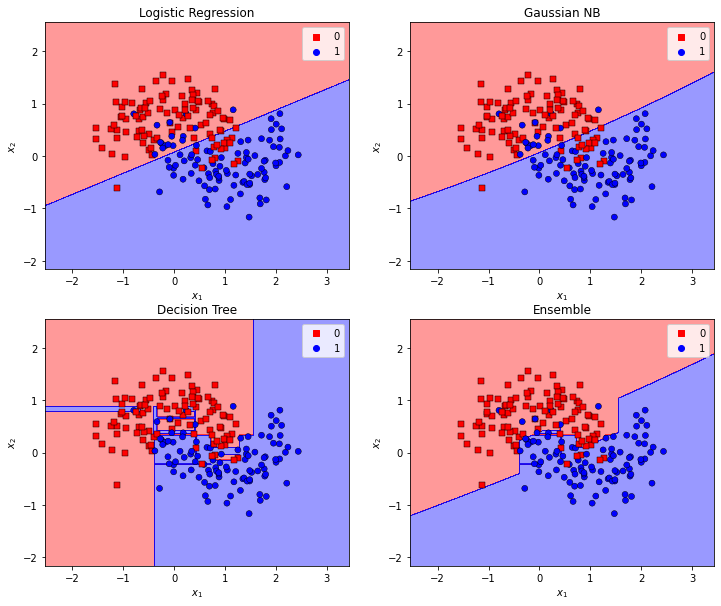

In [10]:
feature_names = ['$x_1$', '$x_2$']
class_names = np.array(['0', '1'])

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for clf, name, ax in zip(classifiers, names, axes.flat):
    clf.fit(X, y)
    plot_decision_boundaries(clf, X, y, feature_names, class_names, ax=ax)
    plt.title(name)
    
plt.savefig('figures/voting_classifier.pdf')